In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from logitplots import plt_confusion_matrix, plt_decision_boundaries, plt_correlation_matrix

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("chipVariantCalling_run2.tsv", sep='\t')
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(df[df.chipOrControl == 'Unknown'].index)

C:\Users\patty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,CHIP
5,4010289633,2036,7,0.0034,0.0035,MODERATE,GNB1,chr1:1747198_G/A,Baseline,Male,MS2083,2:2,1007:1019,3:4,35.3,1.31745,CHIP
9,4010289633,2040,5,0.0025,0.0021,MODERATE,GNB1,chr1:1747220_C/T,Baseline,Male,MS2083,2:2,1002:1014,2:3,31.8,1.48196,CHIP
13,4010289633,2041,6,0.0029,0.0025,MODERATE,GNB1,chr1:1747238_G/A,Baseline,Male,MS2083,2:2,1008:1025,3:3,32.7,1.01686,CHIP
17,4010289633,2037,5,0.0025,0.0028,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,920:1028,2:3,32.2,1.34221,CHIP


In [5]:
df.columns

Index(['d.barcode', 'DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'SYMBOL', 'loci',
       'sampleTimePt', 'gender', 'MSID', 'BIAS', 'REFBIAS', 'VARBIAS', 'QUAL',
       'ODDRATIO', 'chipOrControl'],
      dtype='object')

In [6]:
df.shape

(157676, 17)

In [7]:
df.describe()

,d.barcode,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,1.576760e+05,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000
mean,4.010290e+09,2983.684695,52.948394,0.011444,0.011375,32.173670,2.351721
std,5.375535e+01,5137.808401,1073.826336,0.058150,0.059520,4.415608,18.145123
min,4.010290e+09,2.000000,2.000000,0.002500,0.001500,22.500000,0.000000
25%,4.010290e+09,724.000000,3.000000,0.002900,0.002800,28.300000,1.016450
50%,4.010290e+09,1561.000000,6.000000,0.003700,0.003700,33.000000,1.098992
75%,4.010290e+09,3320.000000,13.000000,0.006000,0.005800,37.000000,1.645776
max,4.010290e+09,216036.000000,173172.000000,1.000000,1.000000,37.000000,3571.428571


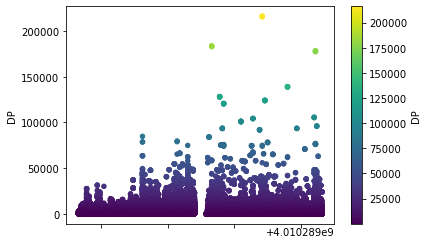

In [8]:
DPscatter = df.plot.scatter(x='d.barcode',
                      y='DP',
                      c='DP',
                      colormap='viridis')

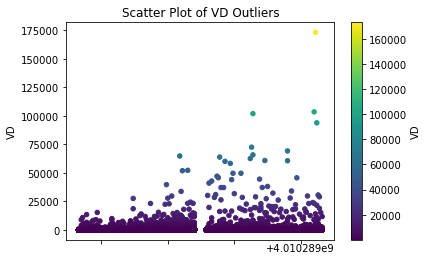

In [3]:
VDscatter = df.plot.scatter(x='d.barcode',
                      y='VD',
                      c='VD',
                      colormap='viridis',
                           title = "Scatter Plot of VD Outliers")

## CORRELATION HEATMAP


Text(0.5, 1.0, 'Run2 Correlation Heat Map')

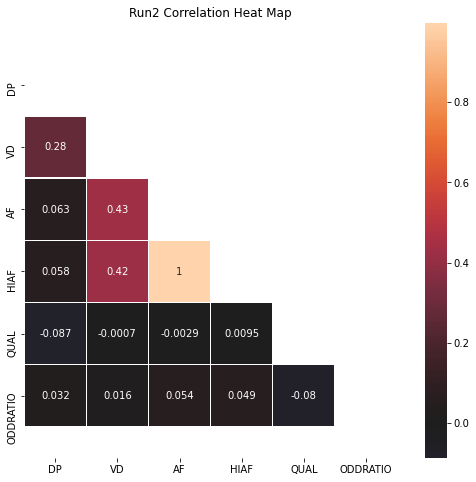

In [5]:
corrs = df.drop('d.barcode', axis = 1).corr()
plt_correlation_matrix(corrs)
plt.title("Run2 Correlation Heat Map")

# CONTINUOUS VARIABLE PAIR PLOT

C:\Users\patty\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\patty\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\patty\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\patty\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is depr

Text(0.5, 0.98, 'Run 2 Pairplot')

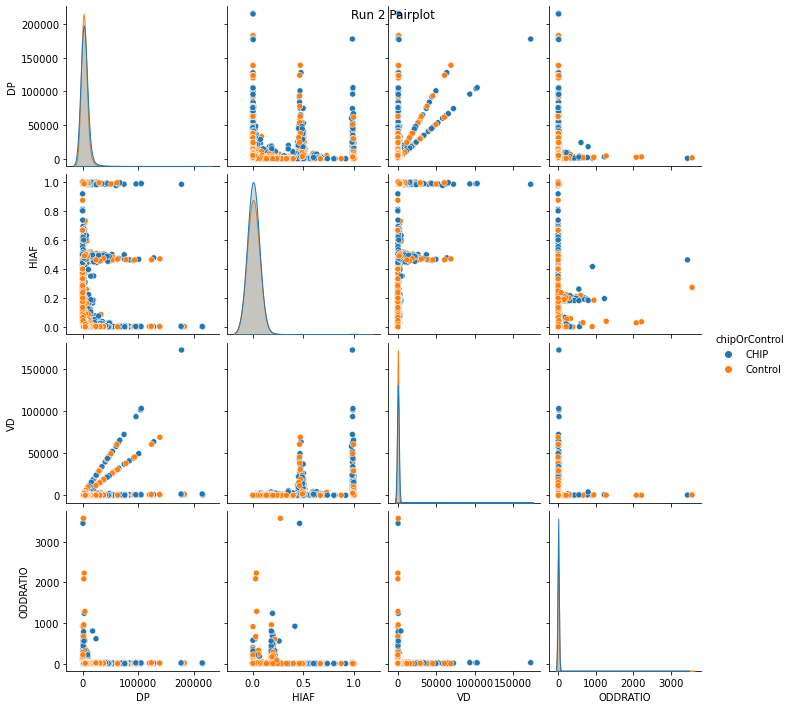

In [7]:
p = sns.pairplot(df, vars = ['DP', "HIAF","VD", "ODDRATIO"], hue="chipOrControl", diag_kws={'bw':1.0})
p.fig.suptitle("Run 2 Pairplot")

In [ ]:
p.show()

# CATEGORICAL PATTERNS

In [14]:
df.head()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,2036,6,0.0029,0.0044,HIGH,GNB1,chr1:1747193_A/G,Baseline,Male,MS2083,2:2,940:982,3:3,35.0,1.04467,0
5,4010289633,2036,7,0.0034,0.0035,MODERATE,GNB1,chr1:1747198_G/A,Baseline,Male,MS2083,2:2,1007:1019,3:4,35.3,1.31745,0
9,4010289633,2040,5,0.0025,0.0021,MODERATE,GNB1,chr1:1747220_C/T,Baseline,Male,MS2083,2:2,1002:1014,2:3,31.8,1.48196,0
13,4010289633,2041,6,0.0029,0.0025,MODERATE,GNB1,chr1:1747238_G/A,Baseline,Male,MS2083,2:2,1008:1025,3:3,32.7,1.01686,0
17,4010289633,2037,5,0.0025,0.0028,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,920:1028,2:3,32.2,1.34221,0


### $Count$ $Plot$

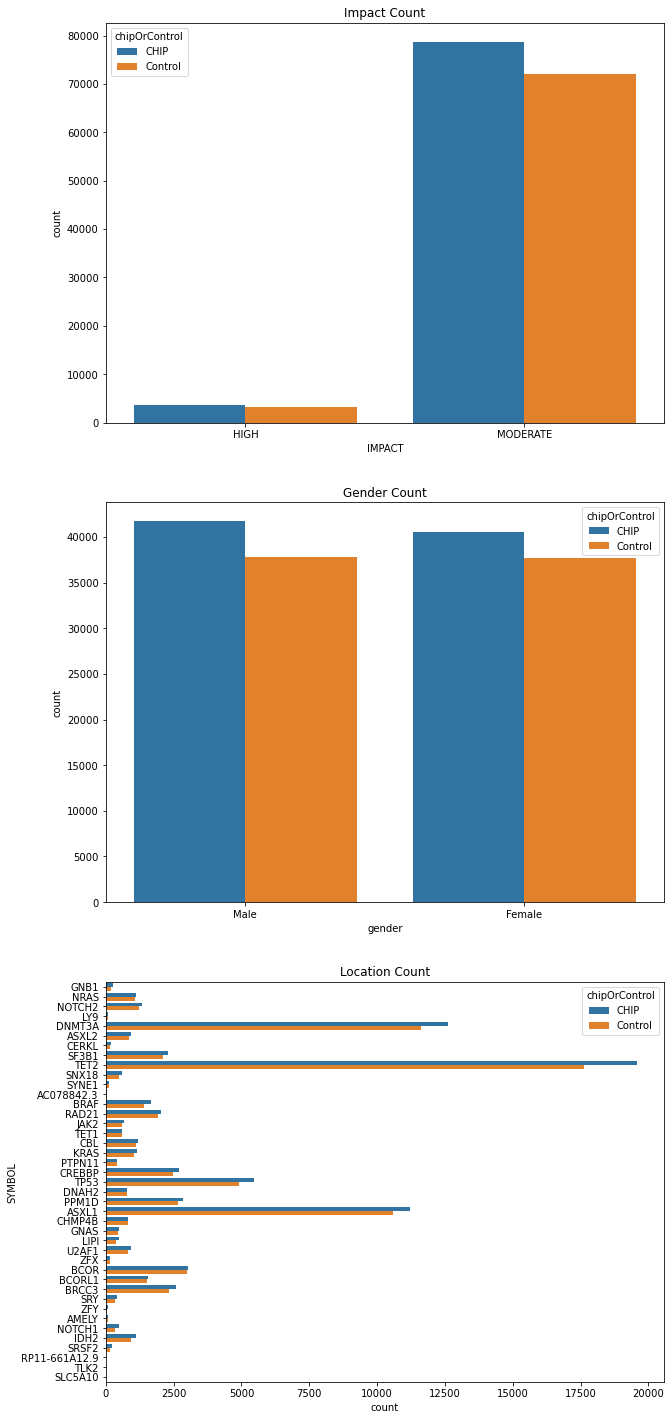

In [21]:
fig, axes = plt.subplots(3, figsize=(10, 25))
sns.countplot(x='IMPACT', hue = 'chipOrControl',data = df, ax=axes[0]).set_title('Impact Count')
sns.countplot(x='gender', hue = 'chipOrControl',data = df, ax=axes[1]).set_title('Gender Count')
sns.countplot(y='SYMBOL', hue = 'chipOrControl',data = df, ax=axes[2]).set_title('Location Count');

### $Males$ $vs$ $Females$

In [16]:
df.groupby('gender').count()

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
gender,,,,,,,,,,,,,,,,
Female,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224,78224
Male,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452,79452


In [17]:
df.value_counts(["gender", "chipOrControl"])

gender  chipOrControl
Male    0                41688
Female  0                40586
Male    1                37764
Female  1                37638
dtype: int64